## Projeto de Disciplina - Validação de modelos de clusterização [25E4_3]
### Aluna: Rosana Ribeiro Lima

O código e demais artefatos deste projeto se encontram disponibilizados em https://github.com/roriblim/PD-validacao-clusterizacao

Além disso, o resultado dos alimentos clusterizados de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

Destaque-se ainda que o t-SNE **não** foi utilizado em nenhuma etapa prévia ou concomitante à clusterização, e sim apenas foi utilizado ao final de todo o processo, para facilitar a visualização. 

### Parte 1 - Infraestrutura

O projeto foi desenvolvido dentro de um ambiente virtual Python 3.12, criado por meio do Anaconda versão 25.5.1. As bibliotecas e dependências encontram-se no requirements.txt, que foi criado a partir do requirements.in. Mais detalhes sobre a configuração feita e sobre como o ambiente foi montado encontram-se no README do projeto Github mencionado acima.

Captura de tela do ambiente rodando na minha máquina:

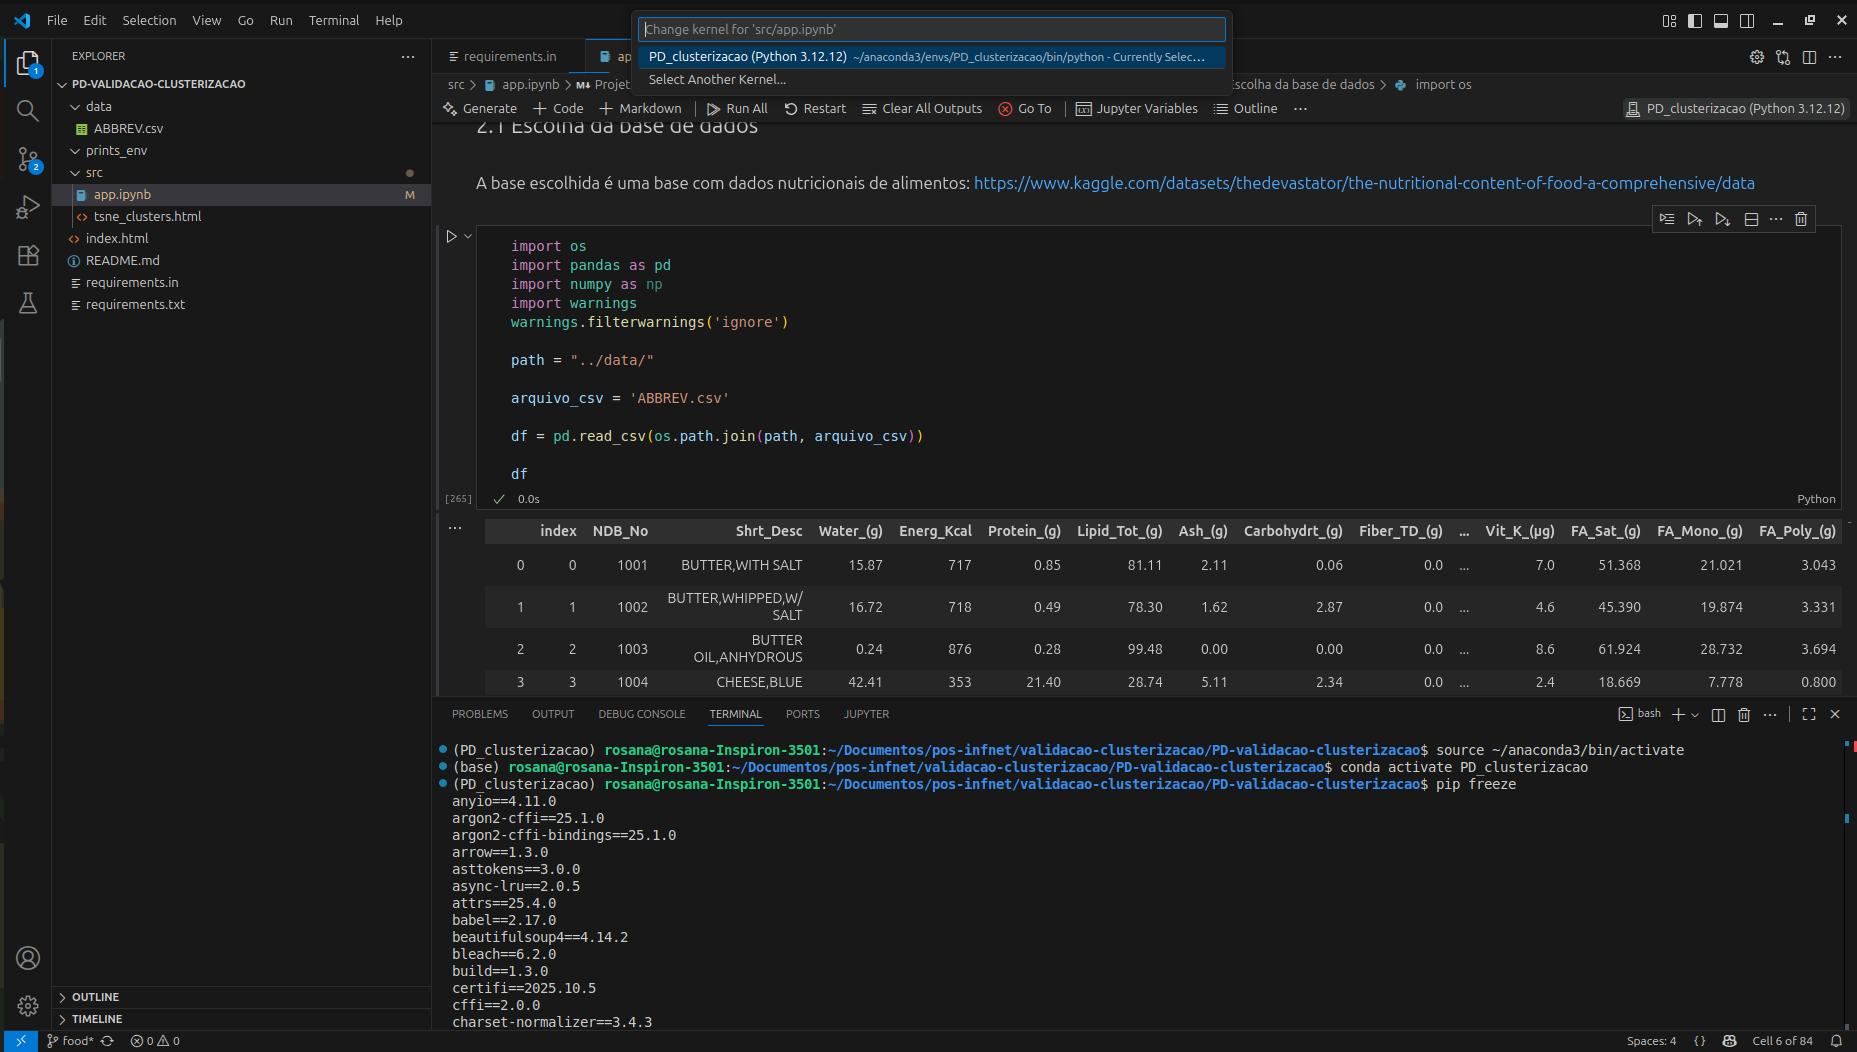

### Parte 2 - Base de dados

#### 2.1 Escolha da base de dados

A base escolhida é uma base disponibilizada no Kaggle com dados nutricionais de alimentos: https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive/data . Essa base contém dados nutricionais para cada 100g de diversos alimentos distintos.

In [275]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = "../data/"

arquivo_csv = 'cars_data_cleaned.csv'

df = pd.read_csv(os.path.join(path, arquivo_csv))

df

,Row_ID,Brand,Model,Battery,km_of_range,0-100,Top_Speed,Range,Efficiency,Fastcharge,Germany_price_before_incentives,Netherlands_price_before_incentives,UK_price_after_incentives,Drive_Configuration,Tow_Hitch,Towing_capacity_in_kg,Number_of_seats,Estimated_US_Value
0,1,TESLA,Model 3,57.5,104,6.1,201,415,139,690,41970,41990,39990,Rear Wheel Drive,Towbar possible,1000,5,49827
1,2,TESLA,Model Y,57.5,137,6.9,217,350,164,580,45970,45990,44990,Rear Wheel Drive,Towbar possible,1600,5,56057
2,3,TESLA,Model Y Long Range Dual Motor,75.0,130,5.0,217,435,172,670,55970,52990,52990,All Wheel Drive,Towbar possible,1600,5,66025
3,4,TESLA,Model 3 Long Range Dual Motor,75.0,106,4.4,201,500,150,770,50970,49990,49990,All Wheel Drive,Towbar possible,1000,5,62287
4,5,TESLA,Model Y Long Range RWD,75.0,109,5.9,217,460,163,710,49970,49990,0,Rear Wheel Drive,Towbar possible,1600,5,27927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,349,MERCEDES-BENZ,eVito Tourer Long 60 kWh,60.0,311,12.0,160,220,273,210,68398,0,0,Front Wheel Drive,Towbar not possible,0,8,72501
349,350,MERCEDES-BENZ,eVito Tourer Extra-Long 60 kWh,60.0,322,12.0,160,215,279,200,69309,0,0,Front Wheel Drive,Towbar not possible,0,8,73467
350,351,KGM,Torres EVX,72.0,130,8.1,175,350,206,390,43990,41250,44495,Front Wheel Drive,Towbar possible,1500,5,55440
351,352,MINI,Aceman E,38.5,163,7.9,160,230,167,370,37000,38990,31800,Front Wheel Drive,Towbar not possible,0,5,39622


#### 2.2 Justificativa para a escolha: Motivação e Objetivos

A base de dados escolhida para realizar este trabalho é uma base com dados nutricionais de cerca de 8790 alimentos distintos. 
Para a escolha da base foram levados em consideração três fatores:

1 - Potencial de gerar resultados de clusterização com valor prático. No caso, por meio da clusterização de alimentos, é possível por exemplo: identificar alimentos semelhantes ou próximos entre si nos valores nutricionais e entender como eles se relacionam, achar substitutos em uma dieta, ou ainda encontrar alimentos alternativos em caso de algum tipo de intolerância alimentar com valores nutricionais semelhantes;

2 - Dados com alta qualidade técnica. Na base escolhida, tem-se uma quantidade considerável de dados, e para cada uma tem-se dados numéricos contínuos úteis para a clusterização, como: quantidade de kcal, lipídios, proteínas. Essas variáveis têm natureza quantitativa e comparável, o que é especialmente adequado para algoritmos de clusterização como K-means, DBSCAN, e clustering hierárquico. Além disso, o fato de serem características técnicas — e não meramente categóricas ou subjetivas — reduz ruído e aumenta a robustez dos agrupamentos.

3 - Complexidade adequada. A combinação entre o número de entradas no dataset e a variedade de atributos permite explorar decisões importantes em clusterização, como: normalização, seleção e interpretação de variáveis, ajuste de hiperparâmetros (exemplo: eps e min_samples no DBSCAN), e comparação entre diferentes algoritmos.



#### 2.3 Faixa dinâmica das variáveis e análise do que deve ser feito

O tratamento inicial dos dados para poder visualizar a faixa dinâmica das variáveis consistirá das seguintes etapas:

2.3.1 - **análise do dataset, quantidade e tipos das variáveis**;

2.3.2 - **remoção de dados nulos e/ou repetidos, se houver**;

2.3.3 - **escolha das variáveis para a clusterização (análise de correlação)**;

2.3.4 - **plot da distribuição de cada variável a ser utilizada na clusterização (por meio de boxplot e histograma contínuo)**.

Cada uma deles será abordado de forma mais detalhada a seguir.


##### 2.3.1 Análise do dataset, quantidade e tipos das variáveis

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row_ID                               353 non-null    int64  
 1   Brand                                353 non-null    object 
 2   Model                                353 non-null    object 
 3   Battery                              353 non-null    float64
 4   km_of_range                          353 non-null    int64  
 5   0-100                                353 non-null    float64
 6   Top_Speed                            353 non-null    int64  
 7   Range                                353 non-null    int64  
 8   Efficiency                           353 non-null    int64  
 9   Fastcharge                           353 non-null    int64  
 10  Germany_price_before_incentives      353 non-null    int64  
 11  Netherlands_price_before_incenti

In [277]:
df.columns

Index(['Row_ID', 'Brand', 'Model', 'Battery', 'km_of_range', '0-100',
       'Top_Speed', 'Range', 'Efficiency', 'Fastcharge',
       'Germany_price_before_incentives',
       'Netherlands_price_before_incentives', 'UK_price_after_incentives',
       'Drive_Configuration', 'Tow_Hitch', 'Towing_capacity_in_kg',
       'Number_of_seats', 'Estimated_US_Value'],
      dtype='object')

Vamos focar em utilizar alguns nutrientes principais, principalmente os macronutrientes. Para isso, sabemos que cada alimento da tabela é dado em uma porção de 100g. Assim, temos:

In [278]:
selected_columns = ['Battery','0-100','Top_Speed','Range','Efficiency','Model','Brand']

In [279]:
df_cars = df.loc[:, selected_columns]
df_cars = df_cars.rename(columns={
                                      'Battery': 'Bateria (kWh)',
                                      '0-100': 'Aceleração (0-100 km/h) (s)',
                                        'Top_Speed': 'Velocidade Máxima (km/h)',
                                        'Range': 'Distância da carga total (km)',
                                        'Efficiency': 'Eficiência (Wh/km)',})

df_cars['Brand_Model'] = df_cars['Brand'].astype(str) + ' - ' + df_cars['Model'].astype(str)
df_cars = df_cars.drop(columns=['Model', 'Brand'])
df_cars.head(20)

,Bateria (kWh),Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km),Brand_Model
0,57.5,6.1,201,415,139,TESLA - Model 3
1,57.5,6.9,217,350,164,TESLA - Model Y
2,75.0,5.0,217,435,172,TESLA - Model Y Long Range Dual Motor
3,75.0,4.4,201,500,150,TESLA - Model 3 Long Range Dual Motor
4,75.0,5.9,217,460,163,TESLA - Model Y Long Range RWD
5,60.5,7.3,160,330,183,BYD - ATTO 3
6,61.7,7.9,160,360,171,MG - MG4 Electric 64 kWh
7,82.5,3.8,180,490,168,BYD - SEAL 82.5 kWh AWD Excellence
8,75.0,3.8,250,415,181,TESLA - Model Y Performance
9,80.7,5.7,190,515,157,BMW - i4 eDrive40


In [280]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Bateria (kWh)                  353 non-null    float64
 1   Aceleração (0-100 km/h) (s)    353 non-null    float64
 2   Velocidade Máxima (km/h)       353 non-null    int64  
 3   Distância da carga total (km)  353 non-null    int64  
 4   Eficiência (Wh/km)             353 non-null    int64  
 5   Brand_Model                    353 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 16.7+ KB


É possível perceber que os dados que serão utilizados na clusterização estão todos em valores numéricos: proteínas, lipídios, carboidratos e fibras.
Identificamos ainda que há valores nulos a serem tratados, no caso das fibras.

In [281]:
df_cars.shape

(353, 6)

In [282]:
df_cars.describe()

,Bateria (kWh),Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km)
count,353.000000,353.000000,353.00000,353.000000,353.000000
mean,74.250142,6.592918,187.72238,393.371105,188.056657
std,20.854211,2.509602,34.29115,96.582783,24.537823
min,21.300000,2.200000,125.00000,135.000000,139.000000
25%,60.000000,4.700000,160.00000,335.000000,170.000000
50%,77.000000,6.500000,180.00000,400.000000,184.000000
75%,90.000000,8.000000,205.00000,465.000000,202.000000
max,123.000000,19.100000,325.00000,665.000000,286.000000


In [283]:
df_cars[df_cars.duplicated(keep=False)]

,Bateria (kWh),Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km),Brand_Model
1,57.5,6.9,217,350,164,TESLA - Model Y
25,25.0,19.1,125,165,152,DACIA - Spring Electric 45
29,57.5,6.9,217,350,164,TESLA - Model Y
93,25.0,19.1,125,165,152,DACIA - Spring Electric 45


Verificamos ainda que há um valor repetido que precisa ser tratado, conforme resultado acima.

##### 2.3.2 Remoção de dados nulos e/ou repetidos

Como foi possível verificar na análise do item 2.3.1, há itens nulos no dataset (o df.info() mostrou que tem-se 8790 dados no total, mas no caso das fibras, há apenas 8196 dados não nulos; e no caso do colesterol, há apenas 8380 dados não nulos).

Ainda conforme o item 2.3.1, foi possível identificar um dado duplicado, correspondente aos ids 774 e 775. Assim, apenas uma dessas duplicatas deve ser mantida:

In [284]:
df_cars = df_cars.drop_duplicates()
df_cars = df_cars.dropna().reset_index(drop=True)
df_cars.shape

(351, 6)

Após a remoção dos dados nulos e remoção das duplicatas, foram reduzidos para 7938 o número de dados. Agora, se verificarmos novamente se há dados duplicados, não encontraremos:

In [285]:
df_cars[df_cars.duplicated(keep=False)]

,Bateria (kWh),Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km),Brand_Model


##### 2.3.3 Escolha das variáveis para a clusterização

As principais variáveis a serem utilizadas já foram selecionadas acima, e se referem a alguns dos principais nutrientes dos alimentos.

Além disso, para a clusterização, precisamos remover a descrição do alimento.

In [286]:
df_clust = df_cars.drop(columns=['Brand_Model'])
df_clust

,Bateria (kWh),Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km)
0,57.5,6.1,201,415,139
1,57.5,6.9,217,350,164
2,75.0,5.0,217,435,172
3,75.0,4.4,201,500,150
4,75.0,5.9,217,460,163
...,...,...,...,...,...
346,60.0,12.0,160,220,273
347,60.0,12.0,160,215,279
348,72.0,8.1,175,350,206
349,38.5,7.9,160,230,167


Agora, podemos procurar identificar, dentre as variáveis restantes, se existem variáveis altamente correlacionadas (nesse caso, poderíamos utilizar apenas uma delas):

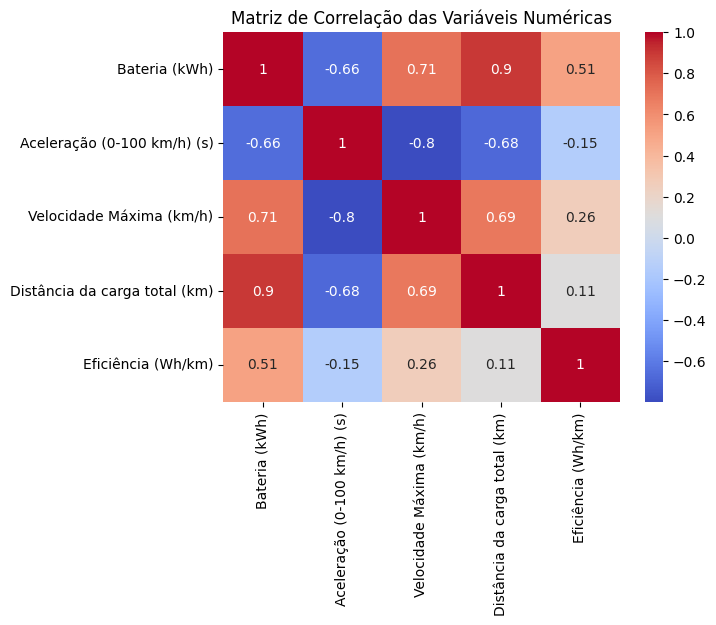


Pares com alta correlação (|corr| >= 0.7):


,Variavel_1,Variavel_2,Correlacao
1,Bateria (kWh),Velocidade Máxima (km/h),0.708858
2,Bateria (kWh),Distância da carga total (km),0.898603
4,Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),-0.797054


In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlação
corr = df_clust.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

# Encontrar pares altamente correlacionados
# threshold: |correlação| >= 0.7
threshold = 0.7

corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) 
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Variavel_1', 'Variavel_2', 'Correlacao']

high_corr = corr_pairs[abs(corr_pairs['Correlacao']) >= threshold]
print("\nPares com alta correlação (|corr| >= 0.7):")
display(high_corr)


Analisando os dados, é possível observar que os dados em geral apresentam informações significativas, sem muita correlação. Todavia, uma alta correlação pôde ser observada em um par de dados, a saber: kcal e Lipídios. Apesar de alta, essa correlação está na faixa de 80%, então se descartada alguma dessas colunas, corre-se o risco de perder dados importantes e significativos. 

Então serão mantidas essas colunas:



In [288]:
df_clust.drop(columns=['Bateria (kWh)'], inplace=True)
clust_cols = df_clust.columns
clust_cols

Index(['Aceleração (0-100 km/h) (s)', 'Velocidade Máxima (km/h)',
       'Distância da carga total (km)', 'Eficiência (Wh/km)'],
      dtype='object')

##### 2.3.4 Plot de distribuição das variáveis - faixa dinâmica

Agora vamos então plotar a distribuição dessas variáveis:

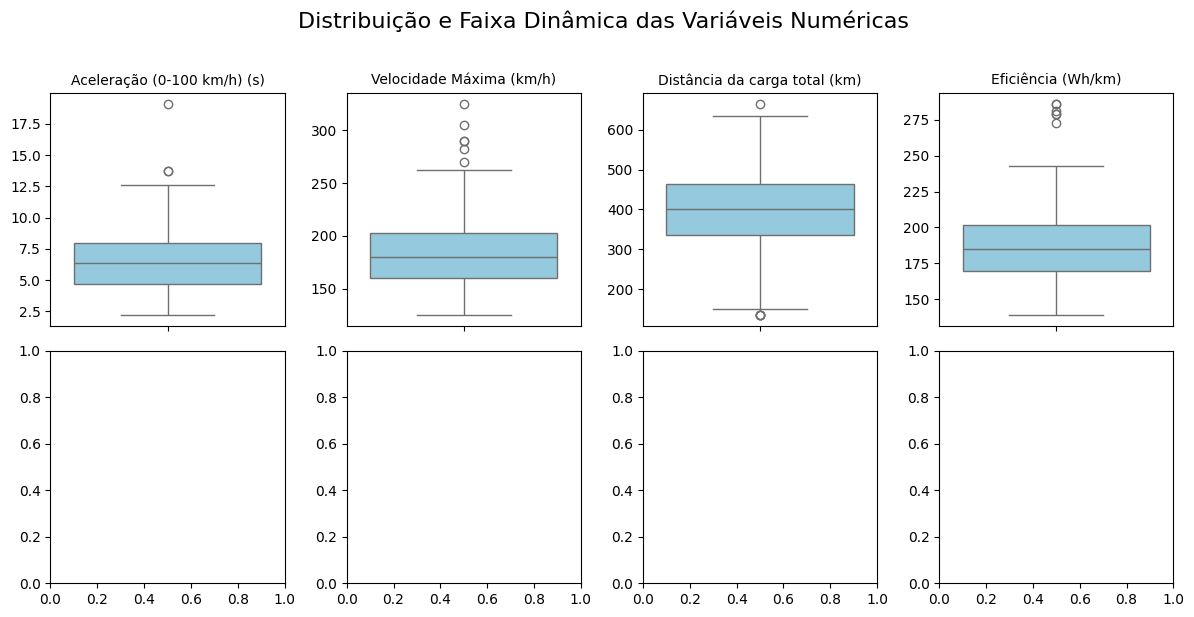

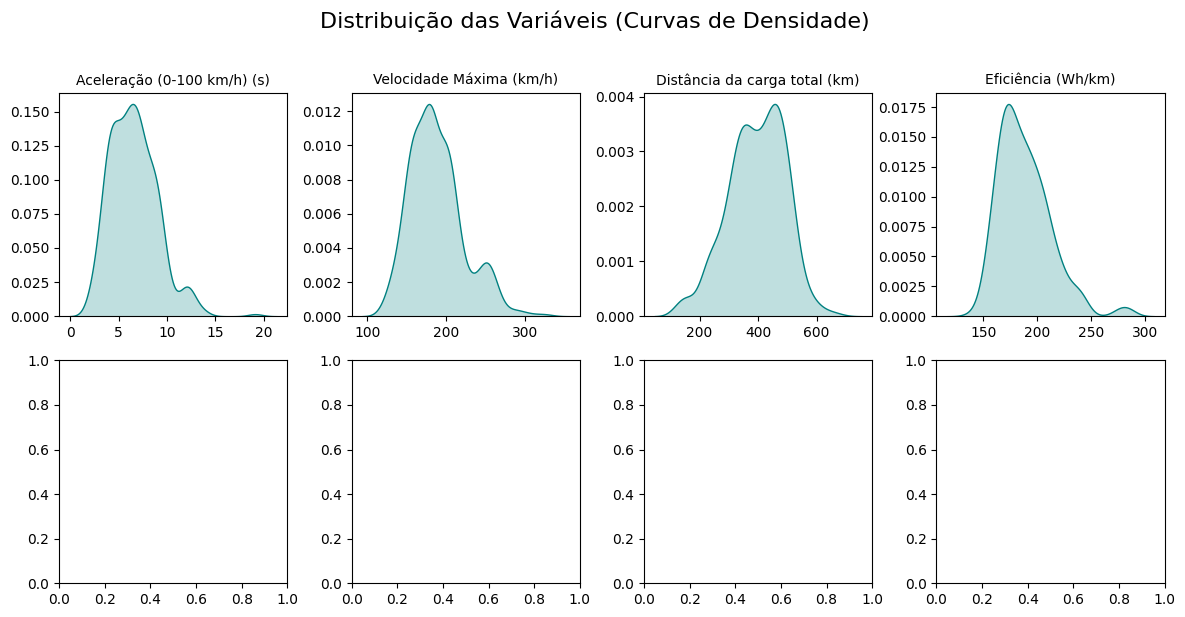

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- BOXPLOTS
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Distribuição e Faixa Dinâmica das Variáveis Numéricas", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.boxplot(y=df_clust[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Distribuição das Variáveis (Curvas de Densidade)", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(clust_cols):
    sns.kdeplot(df_clust[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

#### 2.4 Pré-processamento dos dados

Observa-se que muitas dessas variáveis possuem dados mais concentrados em uma pequena faixa de valores. E cada variável possui uma faixa de valores distinta, portanto, antes de clusterizar, será necessário realizar o escalonamento a fim de deixar todas em uma mesma escala.

Nota-se ainda uma presença significativa de outliers. Como temos uma grande quantidade de outliers reais, então, a fim de lidar com eles deixando as variáveis mais equilibradas, sem que eles desequilibrem os dados, vamos utilizar o RobustScaler. Isso vai evitar que o escalonamento deixe alguns dados muito próximos de zero, e evitar que os outliers tenham um peso excessivo na clusterização.





##### Escalonamento dos dados

In [290]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
df_scaled = df_clust.copy()
df_scaled[clust_cols] = scaler.fit_transform(df_scaled[clust_cols])
# df_scaled.rename(columns={"Proteínas (g)":"Proteínas_scaled",
#                           "Lipídios (g)":"Lipídios_scaled",
#                           "Carboidratos (g)":"Carboidratos_scaled",
#                           "kcal":"kcal_scaled",
#                             "Gorduras Saturadas (g)":"Gorduras_Saturadas_scaled",
#                             "Açúcares (g)":"Açúcares_scaled",
#                           "Fibras (g)":"Fibras_scaled",
#                           ""
                          
#                           },inplace=True)
df_scaled.rename(columns={"Bateria (kWh)":"Bateria_scaled",
                          "Aceleração (0-100 km/h) (s)":"Aceleração_scaled",
                          "Velocidade Máxima (km/h)":"Velocidade_Máxima_scaled",
                          "Distância da carga total (km)":"Distância_scaled",
                            "Eficiência (Wh/km)":"Eficiência_scaled"
                          },inplace=True) 

scaled_columns = df_scaled.columns
df_scaled



,Aceleração_scaled,Velocidade_Máxima_scaled,Distância_scaled,Eficiência_scaled
0,-0.090909,0.488372,0.115385,-1.43750
1,0.151515,0.860465,-0.384615,-0.65625
2,-0.424242,0.860465,0.269231,-0.40625
3,-0.606061,0.488372,0.769231,-1.09375
4,-0.151515,0.860465,0.461538,-0.68750
...,...,...,...,...
346,1.696970,-0.465116,-1.384615,2.75000
347,1.696970,-0.465116,-1.423077,2.93750
348,0.515152,-0.116279,-0.384615,0.65625
349,0.454545,-0.465116,-1.307692,-0.56250


A nova distribuição após o escalonamento dos dados então fica assim:

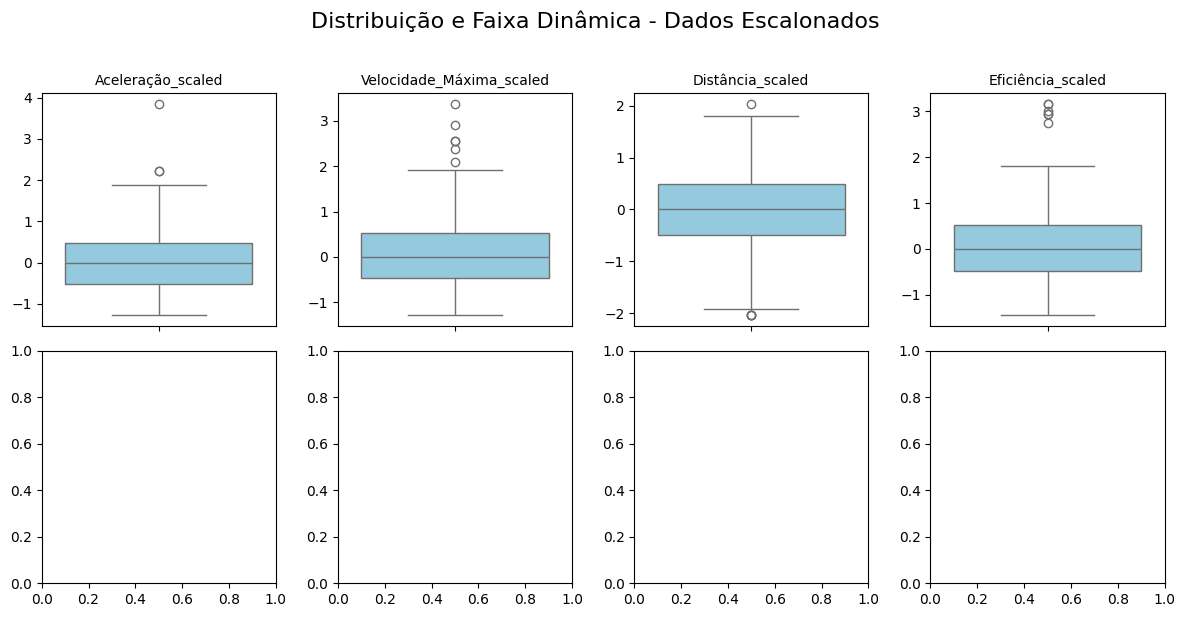

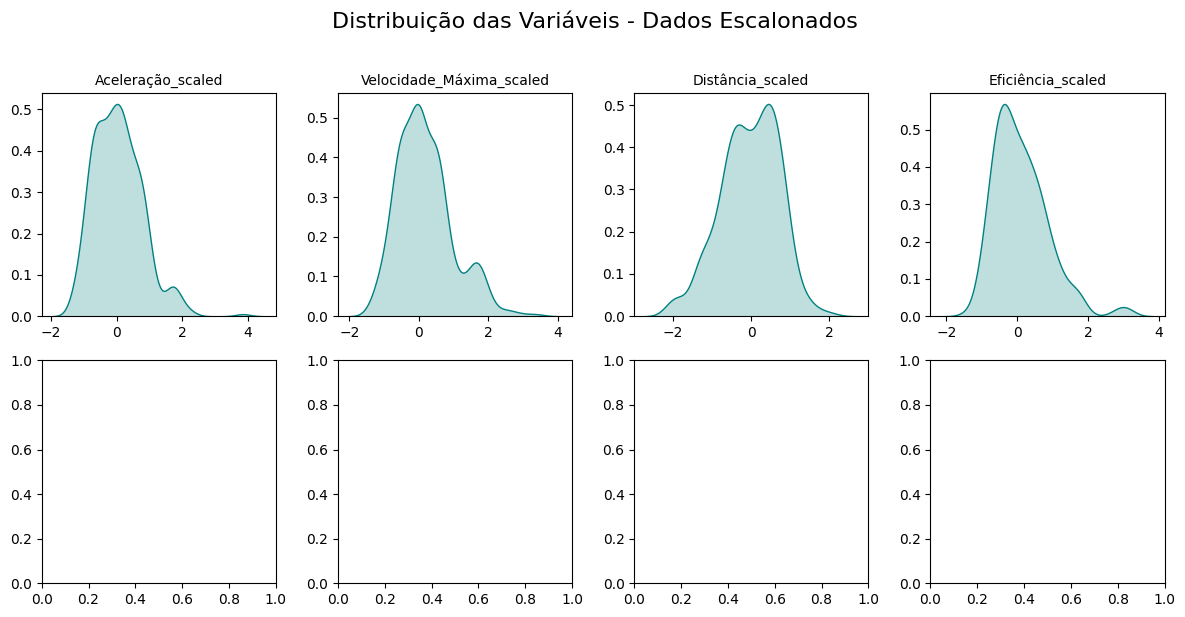

In [291]:
# --- BOXPLOTS
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Distribuição e Faixa Dinâmica - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(scaled_columns):
    sns.boxplot(y=df_scaled[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

# --- HISTOGRAMAS CONTÍNUOS
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Distribuição das Variáveis - Dados Escalonados", fontsize=16, y=1.02)

axes = axes.flatten()

for i, col in enumerate(scaled_columns):
    sns.kdeplot(df_scaled[col], fill=True, ax=axes[i], color="teal")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

### Parte 3 - Clusterização

#### 3.1 Encontrando número adequado de clusters com Índice de Silhueta

##### 3.1.a) K-Médias

A fim de encontrar o número adequado de clusters para o K-Médias usando como referência o Índice de Silhueta, primeiro vamos analisar o intervalo de possibilidades em questão. Para isso, vamos analisar a quantidade de dados que temos, a quantidade de atributos e ainda a quantidade de alimentos em questão:

In [292]:

print(f"Número de amostras: {df_scaled.shape[0]}")
print(f"Número de atributos: {df_scaled.shape[1]}")


Número de amostras: 351
Número de atributos: 4


Para a clusterização então, estamos lidando com 7938 alimentos, cada qual com 6 atributos. Vamos testar então no intervalo até 10 clusters.

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range(2,10)
]

silhouette_score_list = [
    silhouette_score(df_scaled, cluster_model.labels_) for cluster_model in clusters_per_k
]

max_silhouette_score = max(silhouette_score_list)
best_k = silhouette_score_list.index(max_silhouette_score)+2  # +2 porque o range começa em 2, mas o índice começa em 0

print(f"Melhor k: {best_k} com Silhouette Score: {max_silhouette_score:.4f}")


Melhor k: 2 com Silhouette Score: 0.3602


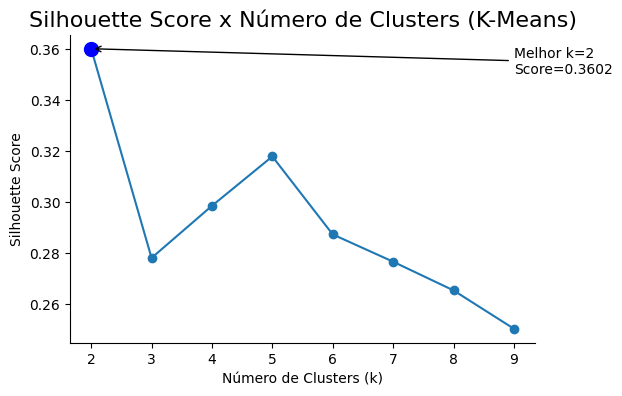

In [294]:
f, ax = plt.subplots(figsize=(6, 4))

ax.plot(range(2,10), silhouette_score_list, marker='o')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score x Número de Clusters (K-Means)', fontsize=16)
ax.plot(best_k, max_silhouette_score, marker='o', markersize=10, color='blue')
ax.annotate(f'Melhor k={best_k}\nScore={max_silhouette_score:.4f}', 
            xy=(best_k, max_silhouette_score), 
            xytext=(best_k+7, max_silhouette_score-0.01),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10)
sns.despine()
plt.show()

O melhor k obtido pelo método da Silhueta para o K-Means foi k=3.


In [295]:
k = best_k
kmeans_best_silhuette = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
labels_kmeans_best_silhuette = kmeans_best_silhuette.labels_

Por fim, vamos analisar rapidamente os resultados para verificar as características de cada Cluster encontrado. Para isso, vamos plotar os centroides e pegar um alimento representativo de cada Cluster por meio do ponto mais próximo a esse centroide:

In [296]:

#####-------------------------------------------------------------------
# Vamos encontrar o centroide de cada cluster

df_com_clusters_scaled = df_scaled.copy()
df_com_clusters_scaled['cluster_kmeans_best_silhuette'] = labels_kmeans_best_silhuette

# media dos dados de cada cluster do kmeans selecionado pelo melhor silhuette - dados escalonados
cluster_means__kmeans_best_silhuette_scaled = df_com_clusters_scaled.groupby('cluster_kmeans_best_silhuette').mean(numeric_only=True)


####-------------------------------------------------------------------
# O mesmo procedimento, mas agora com os dados originais (não escalonados)

df_com_clusters = df_clust.copy()
df_com_clusters['cluster_kmeans_best_silhuette'] = labels_kmeans_best_silhuette

# media dos dados de cada cluster do kmeans selecionado pelo melhor silhuette - dados originais
cluster_means__kmeans_best_silhuette = df_com_clusters.groupby('cluster_kmeans_best_silhuette').mean(numeric_only=True)

print("\nMédia dos dados de cada cluster (K-Means com melhor Silhueta):")
cluster_means__kmeans_best_silhuette




Média dos dados de cada cluster (K-Means com melhor Silhueta):


,Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km)
cluster_kmeans_best_silhuette,,,,
0,8.739716,158.177305,307.056738,182.234043
1,5.090476,207.719048,452.619048,192.252381


In [297]:
print("\nMédia dos dados de cada cluster (K-Means com melhor Silhueta) - escalonado:")
cluster_means__kmeans_best_silhuette_scaled


Média dos dados de cada cluster (K-Means com melhor Silhueta) - escalonado:


,Aceleração_scaled,Velocidade_Máxima_scaled,Distância_scaled,Eficiência_scaled
cluster_kmeans_best_silhuette,,,,
0,0.709005,-0.507505,-0.714948,-0.086436
1,-0.396825,0.644629,0.404762,0.226637


In [298]:
representantes = []

# vamos procurar dentre os dados escalonados, o ponto mais próximo do centroide de cada cluster
for cluster_id in sorted(df_com_clusters_scaled['cluster_kmeans_best_silhuette'].unique()):

    pontos_cluster = df_scaled.loc[df_com_clusters_scaled['cluster_kmeans_best_silhuette'] == cluster_id]
    centroide = cluster_means__kmeans_best_silhuette_scaled.loc[cluster_id].values
    distancias = np.linalg.norm(pontos_cluster.values - centroide, axis=1)

    # Índice do ponto mais próximo
    idx_min = distancias.argmin()
    indice_original = pontos_cluster.iloc[idx_min].name

    # Recuperar alimento da base original
    alimento = df_cars.loc[indice_original, "Brand_Model"]


    representantes.append({
        "Cluster": cluster_id,
        "Alimento": alimento

    })

df_representantes = pd.DataFrame(representantes)
df_representantes


,Cluster,Alimento
0,0,VOLKSWAGEN - ID.4 Pure
1,1,MERCEDES-BENZ - EQE AMG 43 4MATIC


Encontramos assim o alimento mais representativo de cada cluster pelo método de ponto mais próximo de cada centroide.
Vamos a seguir plotar os gráficos com os centroides de cada cluster, a fim de analisá-los.

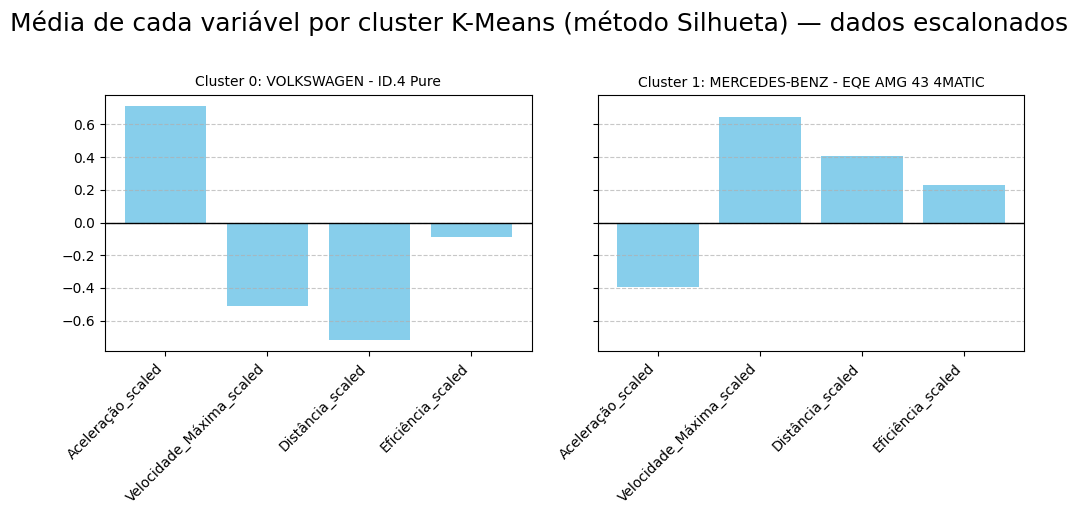

In [299]:
import matplotlib.pyplot as plt

rows, cols = 1,2
fig, axes = plt.subplots(rows, cols, figsize=(10, 5), sharey=True)
axes = axes.flatten()

for i, cluster in enumerate(sorted(df_com_clusters_scaled['cluster_kmeans_best_silhuette'].unique())):
    ax = axes[i]
    ax.bar(
        cluster_means__kmeans_best_silhuette_scaled.columns,
        cluster_means__kmeans_best_silhuette_scaled.loc[cluster],
        color='skyblue'
    )
    ax.set_title(f"Cluster {cluster}: {df_representantes.loc[df_representantes['Cluster'] == cluster, 'Alimento'].values[0]}", fontsize=10)
    ax.set_xticklabels(cluster_means__kmeans_best_silhuette_scaled.columns, rotation=45, ha='right')
    ax.axhline(0, color='black', linewidth=1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle(
    "Média de cada variável por cluster K-Means (método Silhueta) — dados escalonados",
    fontsize=18,
    y=1.02
)

fig.tight_layout()
plt.show()



Com base nesses resultados, já é possível obter algumas informações sobre esses clusters:

Cluster 0 — Alimentos médios em calorias, com proteína moderada

Esse cluster representa alimentos intermediários em calorias, com cerca de 170 kcal por 100g, boa quantidade de proteína (em torno de 12g) e quantidades moderadas de carboidratos e gorduras. São alimentos mais equilibrados, com perfil nutricional relativamente balanceado e pouco açúcar. O alimento mais próximo do centróide é um sanduíche Subway, o que reforça a ideia de preparações com proteína moderada, carboidrato proveniente do pão e gordura proveniente de queijos/molhos, mas ainda com valor calórico total mediano.

Cluster 1 — Alimentos extremamente gordurosos e calóricos

Esse grupo concentra os alimentos mais energéticos, com cerca de 650 kcal por 100g, altíssimo teor de lipídios (67g em média) e níveis elevados de gorduras saturadas (~22g). A proteína é moderada e os carboidratos são baixos. É um cluster claramente dominado por alimentos ricos em gordura pura, como cortes muito gordurosos de carne ou gordura processada. O alimento mais próximo do centróide é um corte de carne Wagyu com alto teor de gordura, representando fielmente esse perfil nutricional.

Cluster 2 — Alimentos ricos em carboidratos e fibras

Esse cluster tem valores elevados de carboidratos (62g por 100g) e uma quantidade expressiva de fibras (~13g), além de valores moderados de gordura e proteína. Representa alimentos tipicamente integrais, derivados de grãos ou cereais ricos em fibras, como granolas, cereais matinais mais naturais ou barras integrais. O alimento mais representativo do grupo é um cereal Kashi Honey Toasted Oat, o que se encaixa perfeitamente com o alto teor de fibras e carboidratos observados.

Cluster 3 — Alimentos muito açucarados

Esse cluster reúne alimentos de alta densidade calórica (≈414 kcal/100g) com teor extremamente elevado de açúcar (≈42g por 100g) e valores baixos de proteína e fibras. É um perfil típico de alimentos altamente processados como biscoitos, doces, snacks açucarados e sobremesas prontas. O alimento mais típico encontrado é um “100 Cal Right Bites”, um snack doce industrializado, mascando muito bem o padrão de elevado açúcar e poucos nutrientes estruturais (baixa proteína e fibras).



##### 3.1.b) DBScan

A fim de encontrar o número adequado de clusters no caso do DBScan, é necessário primeiro determinar o eps (raio da vizinhança) e o min_samples (número mínimo de pontos da vizinhança) ideais. Para isso, vamos partir de algumas heurísticas:

- se número de dimensões é maior que 2, minSample poderia ser o dobro do número de dimensões (min_samples = 2*d)
- se eu tenho um número grande de dados (n > 1000) -> então minSamples poderia ser ln(n) (logaritmo natural/neperiano de n)
- uma boa ideia é testar valores entre 3 e 2*d
 
 No dataset em questão, como já visto acima, tem-se um total de 15149 dados. O logaritmo neperiano desse valor pode ser calculado da seguinte forma:

In [300]:
print(f'Quantidade de dados: {df_scaled.shape[0]}')
print(f'Logaritmo neperiano de {df_scaled.shape[0]} é aproximadamente: {int(np.log(df_scaled.shape[0]))}')

Quantidade de dados: 351
Logaritmo neperiano de 351 é aproximadamente: 5


Se analisarmos apenas pelo número de dimensões, então 2*d seria:

In [301]:
print(f'Número de dimensões: {df_scaled.shape[1]}')
print(f'Dobro do número de dimensões: {2 * df_scaled.shape[1]}')

Número de dimensões: 4
Dobro do número de dimensões: 8


Utilizando as heurísticas acima, portanto, uma boa ideia é testar valores de min_samples entre 3 e 12.

In [302]:
min_samples_range = range(3, 8, 1)

Para descobrir o valor de eps, todavia, deve-se levar em consideração a interdependência entre eps e min_samples. Assim, a depender do valor de eps ideal, teremos um min_samples ideal e vice-versa. Portanto, vamos focar em encontrar um intervalo ideal para o eps, assim como foi feito para o min_samples_range, em seguida vamos testar as possíveis combinações entre eles com um grid.

A fim de encontrar esse intervalo de eps, vai ser utilizado o método de distância dos k-vizinhos.
Para isso:, primeiro será calculada a distância de cada ponto ao seu k-ésimo vizinho mais próximo, com $k = min\_samples - 1$. Em seguida, essas distâncias serão ordenadas em ordem crescente, e plotadas em um gráfico. O gráfico deve mostrar um ponto de inflexão acentuado. Esse ponto de inflexão representa o intervalo que contém o valor ideal de eps.

Então, em resumo, a abordagem que faremos é a seguinte:

1 - com um eps fixo de 0.5, iteraremos no intervalo já definido de min_samples_range para encontrar o best_min_samples_inicial

2 - utilizando o best_min_samples_inicial como min_samples, utilizaremos o gráfico de distância dos k-vizinhos para encontrar o intervalo mais provável de eps (pelo ponto de inflexão no gráfico dos k-vizinhos), e chamaremos esse intervalo de eps_range

3 - iteraremos em min_samples_range e em eps_range em um grid para encontrar a melhor combinação entre ambos (a combinação que maximize o Índice de Silhueta)


In [303]:
from sklearn.cluster import DBSCAN

best_min_samples_inicial = None
best_score = -1

for min_samples in min_samples_range:
  dbscan_model = DBSCAN(eps=0.5, min_samples=min_samples).fit(df_scaled)

  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster real, sem considerar o ruído (-1 é o rótulo do ruído e 0 seria um único cluster)
  clusters_reais = set(labels) - {-1}
  if len(clusters_reais) > 1:
    
    score = silhouette_score(df_scaled, labels)

    print('Min_samples:', min_samples)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
        
      best_score = score
      best_min_samples_inicial = min_samples
  else:
    print('Min_samples:', min_samples)
    print('Score: Apenas um cluster formado.')
    print('-----------------------------------')


print(f'Melhor min_samples: {best_min_samples_inicial}')
print(f'Melhor score: {best_score}')

Min_samples: 3
Score: -0.16263452963493558
-----------------------------------
Min_samples: 4
Score: 0.03030388963737198
-----------------------------------


Min_samples: 5
Score: 0.1819354714802954
-----------------------------------
Min_samples: 6
Score: 0.16183570675771003
-----------------------------------
Min_samples: 7
Score: 0.14287442111356735
-----------------------------------
Melhor min_samples: 5
Melhor score: 0.1819354714802954


Agora, vamos encontrar a distância de cada ponto ao seu k-ésimo vizinho mais próximo, com $k = min\_samples - 1$.
No caso, como min_samples inicial é 11, então encontraremos a distância de cada ponto ao seu 10º vizinho mais próximo:

In [304]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=best_min_samples_inicial).fit(df_scaled) 
distances, indices = neighbors.kneighbors(df_scaled)

print(distances)

[[0.         0.60158061 0.82643282 0.87749412 0.90058866]
 [0.         0.52991265 0.57784769 0.82082127 0.89932211]
 [0.         0.27510107 0.36024351 0.40692513 0.43642179]
 ...
 [0.         0.40319056 0.41889363 0.43665912 0.46302767]
 [0.         0.2844458  0.30059414 0.30059414 0.34205567]
 [0.         0.15798965 0.30972601 0.44807239 0.4535255 ]]


In [305]:
k_distances = np.sort(distances[:,-1])
k_distances

array([0.11617446, 0.11617446, 0.11683323, 0.11683323, 0.11683323,
       0.13424814, 0.13424814, 0.14454395, 0.14454395, 0.14986805,
       0.14986805, 0.14986805, 0.15879312, 0.15879312, 0.15879312,
       0.16759223, 0.17415861, 0.17677527, 0.18077203, 0.18077203,
       0.18077203, 0.18223577, 0.18227779, 0.18227779, 0.18227779,
       0.18440259, 0.19230769, 0.19423612, 0.19658572, 0.19658572,
       0.20044126, 0.20044126, 0.20266576, 0.20266576, 0.20266576,
       0.20460499, 0.20491872, 0.2180782 , 0.21927768, 0.22015871,
       0.22015871, 0.22136164, 0.2230591 , 0.22445701, 0.23022586,
       0.23084207, 0.23973301, 0.24545632, 0.24545632, 0.2491655 ,
       0.25128057, 0.25177187, 0.25177187, 0.25177187, 0.25226377,
       0.25463359, 0.25465416, 0.25508705, 0.25508705, 0.25724132,
       0.25901612, 0.2602562 , 0.2620498 , 0.26505687, 0.26585994,
       0.26898232, 0.27190811, 0.27421396, 0.27534271, 0.27534271,
       0.27534271, 0.275452  , 0.27830399, 0.28336783, 0.28624

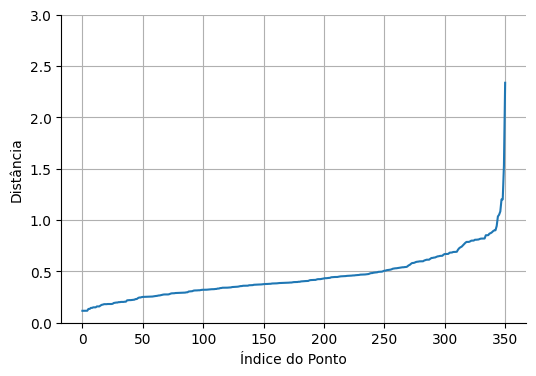

In [306]:
f, ax = plt.subplots(figsize=(6,4))

ax.plot(k_distances)

ax.set_xlabel('Índice do Ponto')
ax.set_ylabel('Distância')

sns.despine()
ax.set_ylim(0, 3)
ax.grid(True)
plt.show()

É possível perceber, portanto, que a distância ideal está com o eps em algum ponto entre 0.2 e 2 (ponto de inflexão no gráfico de distância dos k-vizinhos).

Podemos então agora fazer um grid com o min_samples_range que já definimos e o eps com algum valor entre 0.2 e 2:

In [307]:
print(f'range do min_samples: {min_samples_range}')
eps_values = np.linspace(0.1, 5, 50)
print(f'range do eps: {eps_values}') 

range do min_samples: range(3, 8)
range do eps: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [308]:
param_grid = []
for eps in eps_values:
  for min_samples in min_samples_range:
    param_grid.append({
        'eps': eps,
        'min_samples': min_samples
    })
print('N param', len(param_grid))


N param 250


In [309]:
best_params = None
best_score = -1

for param in param_grid:

    eps = param['eps']
    min_samples = param['min_samples']

    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    labels = dbscan_model.labels_

    # evitar casos com apenas um cluster real (tirando o ruído)
    clusters_reais = set(labels) - {-1}
    if len(clusters_reais) > 1:

        score = silhouette_score(df_scaled, labels)

        # melhor score silhouette
        if score > best_score:
            best_score = score
            best_params = param


print(f'Melhor parametros: {best_params}')
print(f'Melhor score: {best_score}')
print('------------------------------------')

 


Melhor parametros: {'eps': np.float64(1.7000000000000002), 'min_samples': 3}
Melhor score: 0.5192359014684251
------------------------------------


In [310]:
dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"]).fit(df_scaled)

labels_dbscan_best_silhuette = dbscan.labels_

n_ruido = np.sum(labels_dbscan_best_silhuette == -1)
percent_ruido_dbscan = n_ruido / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos de ruído - DBScan: {n_ruido}")
print(f"Percentual de ruído - DBScan: {percent_ruido_dbscan:.2f}%")
print('-----------------------------------')

n_0 = np.sum(labels_dbscan_best_silhuette == 0)
percent_0_dbscan = n_0 / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos label 0 - DBScan: {n_0}")
print(f"Percentual de pontos label 0 - DBScan: {percent_0_dbscan:.2f}%")
print('-----------------------------------')

n_1 = np.sum(labels_dbscan_best_silhuette == 1)
percent_1_dbscan = n_1 / len(labels_dbscan_best_silhuette) * 100

print(f"Quantidade de pontos label 1 - DBScan: {n_1}")
print(f"Percentual de pontos label 1 - DBScan: {percent_1_dbscan:.2f}%")

print('-----------------------------------')
print('Quantidade de labels DBScan:', len(set(labels_dbscan_best_silhuette) - {-1}))



Quantidade de pontos de ruído - DBScan: 0
Percentual de ruído - DBScan: 0.00%
-----------------------------------
Quantidade de pontos label 0 - DBScan: 345
Percentual de pontos label 0 - DBScan: 98.29%
-----------------------------------
Quantidade de pontos label 1 - DBScan: 6
Percentual de pontos label 1 - DBScan: 1.71%
-----------------------------------
Quantidade de labels DBScan: 2


Buscamos utilizar o índice de Silhueta para encontrar a melhor configuração do DBSCAN (valores ideais de eps e min_samples). Entretanto, os resultados mostraram uma clusterização pouco satisfatória, com aproximadamente 99% dos dados agrupados em um único cluster. Esse comportamento se justifica principalmente por dois fatores:

- Limitação do índice de Silhueta para avaliar DBSCAN: diferentemente do K-Means, que organiza os clusters em torno de centroides e tende a formar grupos esféricos, o DBSCAN agrupa pontos com base em densidade local, separando regiões densamente povoadas das regiões de baixa densidade. O índice de Silhueta, por sua vez, é mais adequado a modelos estruturados por distância a centroides e pode não refletir bem a qualidade de clusters baseados em densidade, dificultando a escolha dos hiperparâmetros.

- Características estruturais da base de dados: é provável que os dados não apresentem áreas claramente separadas por regiões de baixa densidade. Quando não há descontinuidades relevantes na distribuição, DBSCAN tende inevitavelmente a unir grande parte dos pontos em um único agrupamento, tornando-o pouco informativo. Nesse contexto, o DBSCAN se mostra um modelo inadequado para capturar estruturas significativas nessa base nutricional.

#### 3.2 Processo de mensuração do índice de silhueta, gráficos e número de clusters escolhido

O índice de Silhueta é uma medida que permite medir a qualidade de cluster, por meio de conceitos de **coesão** e **separação**. Quanto mais coeso aquele ponto estiver do seu cluster, e mais separado dos demais, maior será o índice de Silhueta. 

A silhueta é calculada para cada ponto $i$ pela fórmula:
$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$
Em que $a(i)$ é a distância média entre $i$ e os demais pontos do mesmo cluster e $b(i)$ é a menor distância média entre $i$ e os pontos de outros clusters (ou seja, o cluster mais próximo).

A Silhueta global é calculada pela média: $ S = \frac{1}{n}\sum s(i) $

No caso deste trabalho, para calcular o índice de silhueta utilizamos a função silhouette_score, disponível na biblioteca sklearn.metrics. Foi possível utilizar ainda a função silhouette_samples da mesma biblioteca, a fim de encontrar os coeficientes individuais de Silhueta para plotar os gráficos.

##### Número de clusters escolhido

Conforme bem explicado no item 3.1, para o K-Means o número ideal de Clusters encontrado foi k = 3, enquanto para o DBScan, o número ideal encontrado de clusters foi com k = 2. Essa configuração foi a que maximizou o Índice de Silhueta tanto para o K-Means quanto para o DBScan.

Para o K-Means, foi encontrado Índice de Silhueta máximo = 0.5343 com k = 3.
Para o DBSCan, foi encontrado Índice de Silhueta máximo = 0.8024 com k = 2 (min_samples = 9 e eps = 1.8).

##### Gráficos

Seguem os gráficos, primeiro para o K-Means:



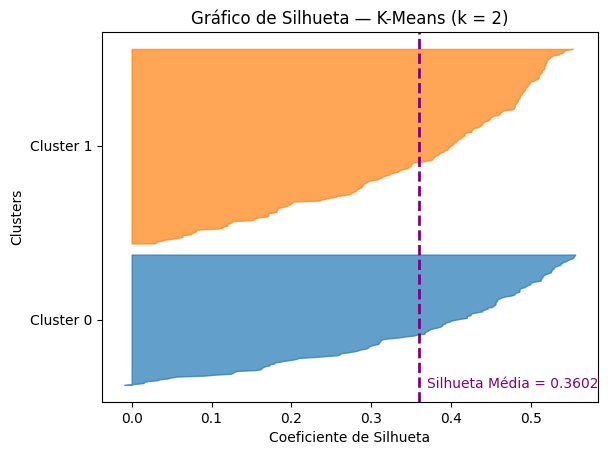

In [311]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

silhouette_coefficients_kmeans = silhouette_samples(df_scaled, labels_kmeans_best_silhuette)
padding = len(df_scaled) // 30
pos = padding
ticks = []
for i in range(k):
    sample_silhouette_values = silhouette_coefficients_kmeans[labels_kmeans_best_silhuette == i]
    sample_silhouette_values.sort()

    color = mpl.cm.tab10(i % 10)

    plt.fill_betweenx(
        np.arange(pos, pos + len(sample_silhouette_values)),
        0,
        sample_silhouette_values,
        alpha=0.7,
        facecolor=color,
        edgecolor=color
    )
    ticks.append(pos + len(sample_silhouette_values) // 2)
    pos += len(sample_silhouette_values) + padding

# ---- eixo Y (clusters) ----
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter([f"Cluster {i}" for i in range(k)]))

# ---- linha da silhueta média ----
sil_avg = silhouette_score(df_scaled, labels_kmeans_best_silhuette)
plt.axvline(x=sil_avg, color='purple', linestyle='--', linewidth=2)
plt.text(sil_avg + 0.01, pos * 0.02, f"Silhueta Média = {sil_avg:.4f}", color="purple")

# ---- labels e título ----
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.title(f"Gráfico de Silhueta — K-Means (k = {len(set(labels_kmeans_best_silhuette))})")
plt.grid(False)

plt.show()

Em seguida para o DBScan:

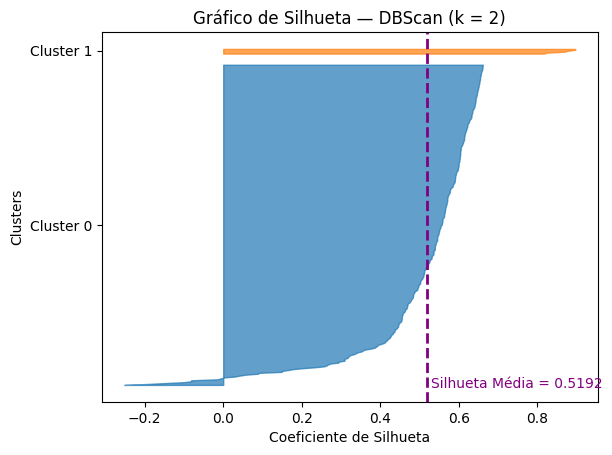

In [312]:
silhouette_coefficients_dbscan = silhouette_samples(df_scaled, labels_dbscan_best_silhuette)
padding = len(df_scaled) // 30
pos = padding
ticks = []
for i in range(2):
    sample_silhouette_values = silhouette_coefficients_dbscan[labels_dbscan_best_silhuette == i]
    sample_silhouette_values.sort()

    color = mpl.cm.tab10(i % 10)        

    plt.fill_betweenx(
        np.arange(pos, pos + len(sample_silhouette_values)),
        0,
        sample_silhouette_values,
        alpha=0.7,
        facecolor=color,
        edgecolor=color
    )
    ticks.append(pos + len(sample_silhouette_values) // 2)
    pos += len(sample_silhouette_values) + padding

# ---- eixo Y (clusters) ----
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter([f"Cluster {i}" for i in range(k)]))

# ---- linha da silhueta média ----
sil_avg = silhouette_score(df_scaled, labels_dbscan_best_silhuette)
plt.axvline(x=sil_avg, color='purple', linestyle='--', linewidth=2)
plt.text(sil_avg + 0.01, pos * 0.02, f"Silhueta Média = {sil_avg:.4f}", color="purple")

# ---- labels e título ----
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Clusters")
plt.title(f'Gráfico de Silhueta — DBScan (k = {len(set(labels_dbscan_best_silhuette)-{-1})})')
plt.grid(False)

plt.show()

#### 3.4 Escolha de duas medidas de validação para comparar com o índice de silhueta, melhor configuração de modelo e análise dos resultados

Para essa etapa, vamos utilizar mais duas métricas para nos ajudar a escolher a melhor configuração de modelo K-Means e DBScan: o Calinski–Harabasz (CHI) e o Davies–Bouldin (DBI).

O DBI é adequado quando queremos verificar separação entre grupos (mede o quão compactos e bem separados estão os clusters - no DBSCAN, isso é útil porque clusters densos tendem a ter baixa dispersão), funciona sem rótulos verdadeiros e é de fácil interpretação (Quanto mais baixo, melhor).

Já o CHI mede dispersão interna vs. externa, usa variância e não centroides (por esse motivo, pode ajudar a dar melhores resultados para o DBScan), e funciona bem em clusters densos. No caso do CHI, quando mais alto o índice, melhor.

Além de ambos poderem ser utilizados para o DBScan, também devem demonstrar bons resultados para o K-Means.

##### Para o K-Means

Vamos encontrar o valor do k do K-Means que minimize o DBI ou maximize o CHI.

In [313]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# treinando kmeans para vários k
clusters_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range(2,12)
]

# calculando CHI e DBI para cada modelo
chi_list = [
    calinski_harabasz_score(df_scaled, model.labels_) for model in clusters_per_k
]

dbi_list = [
    davies_bouldin_score(df_scaled, model.labels_) for model in clusters_per_k
]


# melhores valores
best_k_by_chi = chi_list.index(max(chi_list)) + 2
best_chi_value = max(chi_list)

best_k_by_dbi = dbi_list.index(min(dbi_list)) + 2
best_dbi_value = min(dbi_list)

print(f"► Melhor k segundo CHI: {best_k_by_chi} (CHI = {best_chi_value:.4f})")
print(f"► Melhor k segundo DBI: {best_k_by_dbi} (DBI = {best_dbi_value:.4f})")

► Melhor k segundo CHI: 2 (CHI = 240.6077)
► Melhor k segundo DBI: 6 (DBI = 1.0403)


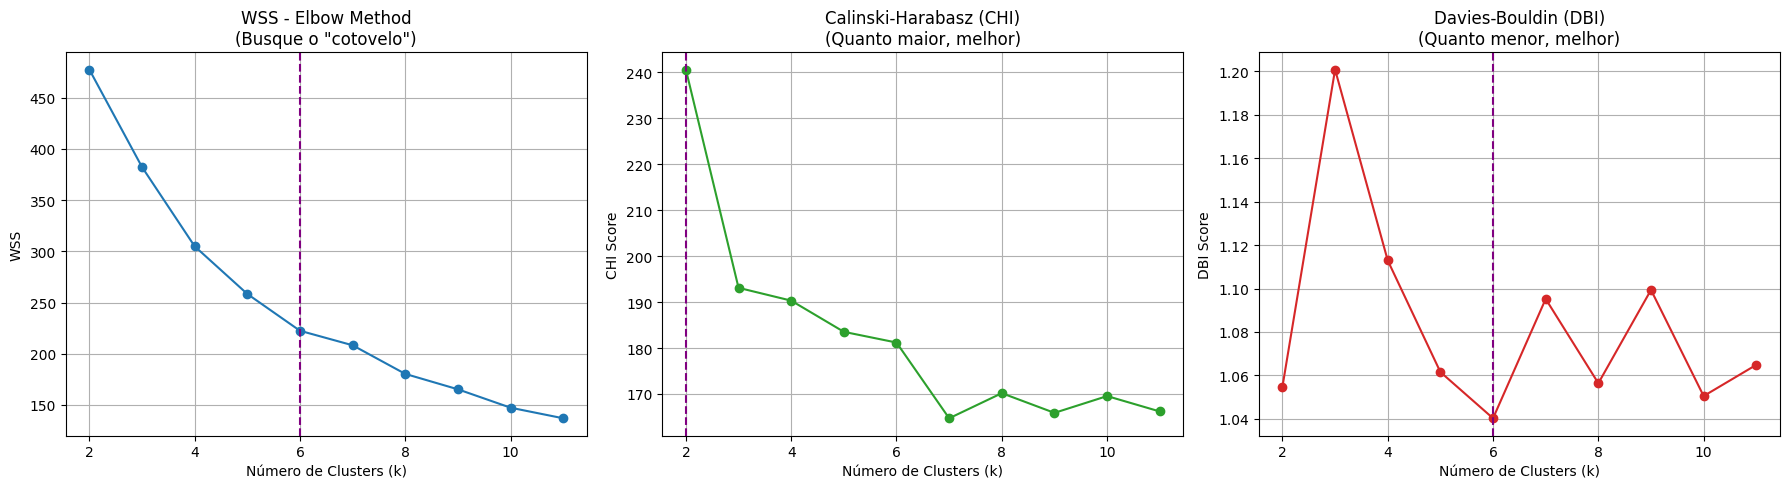

In [314]:
# calculando WSS (inércia) para cada modelo
wss_list = [model.inertia_ for model in clusters_per_k]

k_range = range(2, 12)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- Gráfico 1: WSS ---
axs[0].plot(k_range, wss_list, marker='o', color='tab:blue')
axs[0].set_xlabel('Número de Clusters (k)')
axs[0].set_ylabel('WSS')
axs[0].set_title('WSS - Elbow Method\n(Busque o "cotovelo")')
axs[0].grid(True)

# --- Gráfico 2: CHI ---
axs[1].plot(k_range, chi_list, marker='o', color='tab:green')
axs[1].set_xlabel('Número de Clusters (k)')
axs[1].set_ylabel('CHI Score')
axs[1].set_title('Calinski-Harabasz (CHI)\n(Quanto maior, melhor)')
axs[1].grid(True)

# --- Gráfico 3: DBI ---
axs[2].plot(k_range, dbi_list, marker='o', color='tab:red')
axs[2].set_xlabel('Número de Clusters (k)')
axs[2].set_ylabel('DBI Score')
axs[2].set_title('Davies-Bouldin (DBI)\n(Quanto menor, melhor)')
axs[2].grid(True)

axs[0].axvline(x=6, color='purple', linestyle='--')
axs[1].axvline(x=2, color='purple', linestyle='--')
axs[2].axvline(x=6, color='purple', linestyle='--')
# Ajusta o espaçamento entre os gráficos automaticamente
plt.tight_layout()
plt.show()

In [315]:
kmeans_best_dbi = KMeans(n_clusters=6, random_state=42).fit(df_scaled)
labels_kmeans_best_dbi = kmeans_best_dbi.labels_

In [316]:
df_com_clusters_scaled.drop(columns=['cluster_kmeans_best_silhuette'], inplace=True)
df_com_clusters.drop(columns=['cluster_kmeans_best_silhuette'], inplace=True)

#####-------------------------------------------------------------------
# centroide de cada cluster
df_com_clusters_scaled['cluster_kmeans_best_dbi'] = labels_kmeans_best_dbi

# media dos dados de cada cluster do kmeans selecionado pelo melhor dbi - dados escalonados
cluster_means__kmeans_best_dbi_scaled = df_com_clusters_scaled.groupby('cluster_kmeans_best_dbi').mean(numeric_only=True)


####-------------------------------------------------------------------
# O mesmo procedimento, mas agora com os dados originais (não escalonados)

df_com_clusters['cluster_kmeans_best_dbi'] = labels_kmeans_best_dbi

# media dos dados de cada cluster do kmeans selecionado pelo melhor dbi - dados originais
cluster_means__kmeans_best_dbi = df_com_clusters.groupby('cluster_kmeans_best_dbi').mean(numeric_only=True)

print("\nMédia dos dados de cada cluster (K-Means com melhor DBI):")
cluster_means__kmeans_best_dbi



Média dos dados de cada cluster (K-Means com melhor DBI):


,Aceleração (0-100 km/h) (s),Velocidade Máxima (km/h),Distância da carga total (km),Eficiência (Wh/km)
cluster_kmeans_best_dbi,,,,
0,5.773077,191.846154,470.833333,173.641026
1,11.966667,147.083333,247.916667,245.166667
2,5.154545,202.454545,446.909091,216.236364
3,9.138158,153.171053,285.000000,165.736842
4,3.529787,253.127660,479.042553,196.021277
5,6.789157,174.963855,360.120482,191.325301


In [317]:
print("\nMédia dos dados de cada cluster (K-Means com melhor DBI) - escalonado:")
cluster_means__kmeans_best_dbi_scaled


Média dos dados de cada cluster (K-Means com melhor DBI) - escalonado:


,Aceleração_scaled,Velocidade_Máxima_scaled,Distância_scaled,Eficiência_scaled
cluster_kmeans_best_dbi,,,,
0,-0.189977,0.275492,0.544872,-0.354968
1,1.686869,-0.765504,-1.169872,1.880208
2,-0.377410,0.522199,0.360839,0.976136
3,0.829745,-0.623929,-0.884615,-0.601974
4,-0.869761,1.700643,0.608020,0.344415
5,0.117926,-0.117120,-0.306766,0.197666


In [318]:
representantes = []

# vamos procurar dentre os dados escalonados, o ponto mais próximo do centroide de cada cluster
for cluster_id in sorted(df_com_clusters_scaled['cluster_kmeans_best_dbi'].unique()):

    pontos_cluster = df_scaled.loc[df_com_clusters_scaled['cluster_kmeans_best_dbi'] == cluster_id]
    centroide = cluster_means__kmeans_best_dbi_scaled.loc[cluster_id].values
    distancias = np.linalg.norm(pontos_cluster.values - centroide, axis=1)

    # Índice do ponto mais próximo
    idx_min = distancias.argmin()
    indice_original = pontos_cluster.iloc[idx_min].name

    # Recuperar carro da base original
    car = df_cars.loc[indice_original, "Brand_Model"]


    representantes.append({
        "Cluster": cluster_id,
        "Carro": car

    })

df_representantes = pd.DataFrame(representantes)
df_representantes

,Cluster,Carro
0,0,BMW - i5 eDrive40 Sedan
1,1,MERCEDES-BENZ - eVito Tourer Long 60 kWh
2,2,MERCEDES-BENZ - EQE SUV 500 4MATIC
3,3,PEUGEOT - e-2008 54 kWh
4,4,PORSCHE - Taycan 4S Plus Sport Turismo
5,5,BMW - iX3


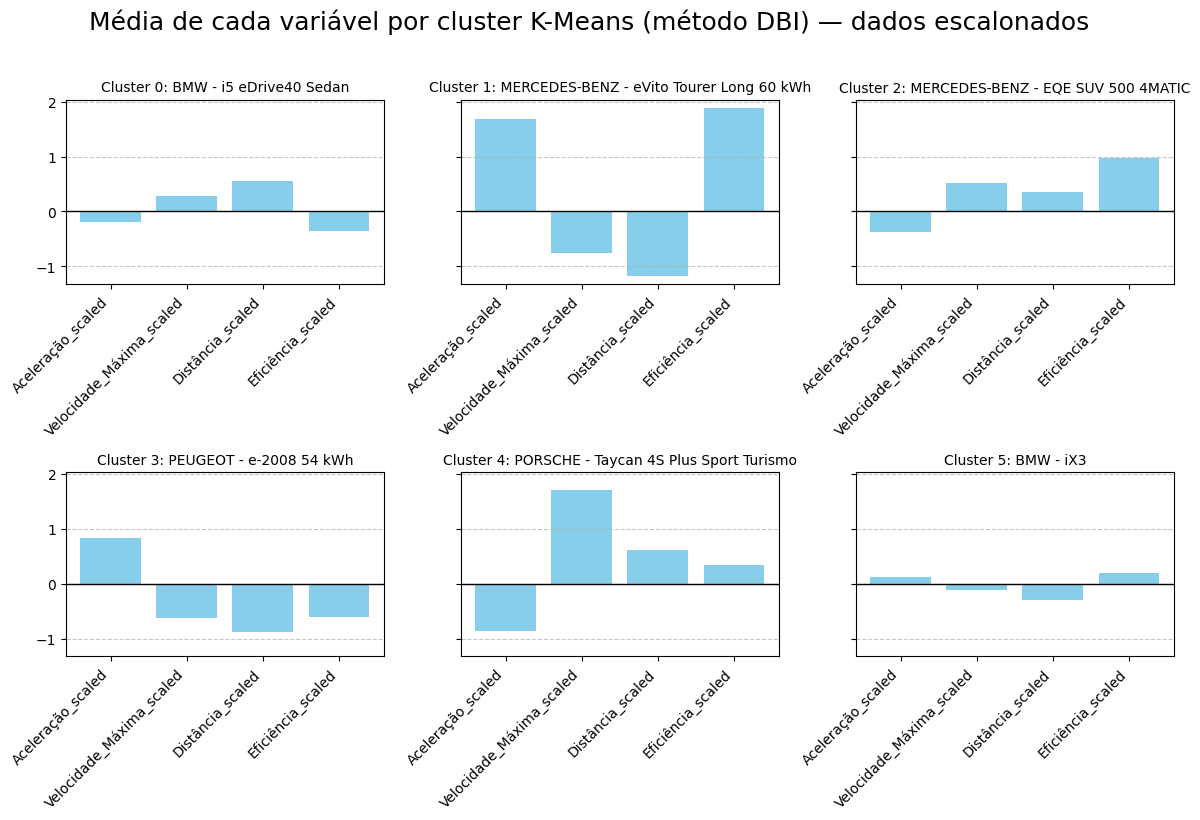

In [319]:
rows, cols = 2,3
fig, axes = plt.subplots(rows, cols, figsize=(12, 8), sharey=True)
axes = axes.flatten()

for i, cluster in enumerate(sorted(df_com_clusters_scaled['cluster_kmeans_best_dbi'].unique())):
    ax = axes[i]
    ax.bar(
        cluster_means__kmeans_best_dbi_scaled.columns,
        cluster_means__kmeans_best_dbi_scaled.loc[cluster],
        color='skyblue'
    )
    ax.set_title(f"Cluster {cluster}: {df_representantes.loc[df_representantes['Cluster'] == cluster, 'Carro'].values[0]}", fontsize=10)

    ax.set_xticklabels(cluster_means__kmeans_best_dbi_scaled.columns, rotation=45, ha='right')
    ax.axhline(0, color='black', linewidth=1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle(
    "Média de cada variável por cluster K-Means (método DBI) — dados escalonados",
    fontsize=18,
    y=1.02
)

fig.tight_layout()
plt.show()

Analisando os novos clusters gerados, podemos descrever cada um:

- Cluster 0: veículos premium equilibrados

O Cluster 0 reúne veículos premium equilibrados, como o BMW i5 eDrive40, que combinam ótima autonomia média de cerca de 470 km com uma aceleração relativamente rápida para a categoria (em torno de 5,8 segundos de 0 a 100 km/h). A velocidade máxima também é alta, em torno de 192 km/h, e a eficiência energética é boa, com consumo médio próximo de 174 Wh/km. Esses modelos se destacam por entregar conforto, eficiência em estrada e desempenho acima da média, sem exageros no consumo ou perda de autonomia.

- Cluster 1: veículos utilitários e comerciais

O Cluster 1 engloba veículos utilitários e comerciais, tendo como exemplo o Mercedes eVito. Esses modelos apresentam aceleração lenta, em média 12 segundos de 0 a 100 km/h, e velocidade máxima mais baixa, em torno de 147 km/h. A autonomia também é reduzida (cerca de 248 km), e a eficiência energética é a pior entre os grupos, com consumo médio acima de 245 Wh/km. Isso evidencia seu foco funcional e urbano, priorizando transporte de passageiros ou carga, e não desempenho ou longos trajetos.

- Cluster 2: SUVs premium de alta performance

O Cluster 2 representa SUVs premium de alta performance, exemplificado pelo Mercedes EQE SUV 500. Esses veículos oferecem forte aceleração em torno de 5,1 segundos até 100 km/h e alta velocidade máxima, próxima de 202 km/h. A autonomia fica em torno de 447 km, valor elevado considerando o porte do carro, enquanto o consumo energético é mais alto — cerca de 216 Wh/km. Esse cluster mostra veículos robustos, potentes e sofisticados, voltados para público que busca espaço, desempenho e tecnologia avançada.

- Cluster 3: veículos urbanos intermediários

O Cluster 3 reúne veículos urbanos intermediários, como o Peugeot e-2008. Esses modelos apresentam aceleração moderada, por volta de 9,1 segundos até 100 km/h, velocidade máxima menor (aproximadamente 153 km/h) e autonomia reduzida, na casa de 285 km. Em contrapartida, a eficiência energética é boa, com consumo próximo de 166 Wh/km. São carros ideais para uso urbano, com bom custo-benefício e sem ambição esportiva.

- Cluster 4: superesportivos elétricos

O Cluster 4 representa os modelos esportivos elétricos de alta performance, como o Porsche Taycan. São os destaques em aceleração, com média de 3,5 segundos de 0 a 100 km/h, e atingem velocidades máximas elevadas, próximas de 253 km/h. Além disso, mantêm uma autonomia alta (cerca de 479 km), com consumo energético na faixa de 196 Wh/km. Esses veículos combinam desempenho extremo com elevada capacidade de bateria, direcionados ao público que busca o máximo de tecnologia, velocidade e experiência premium.

- Cluster 5: SUVs médios equilibrados

Por fim, o Cluster 5 agrupa SUVs médios equilibrados, representados pelo BMW iX3. Esses modelos possuem aceleração intermediária (aproximadamente 6,8 segundos até 100 km/h), velocidade máxima em torno de 175 km/h e autonomia mediana, na faixa de 360 km. A eficiência energética também é intermediária, com consumo de cerca de 191 Wh/km. São veículos versáteis, indicados para quem deseja conforto, boa autonomia e um desempenho satisfatório, sem entrar nos extremos de esportividade ou uso utilitário.

##### Para o DBScan

Vamos encontrar os resultados no GRID que iteramos do DBScan para min_samples e eps que minimize o DBI ou maximize o CHI:

In [320]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

best_params = None
best_score_CHI = -1
best_score_DBI = float('inf')

for param in param_grid:

    eps = param['eps']
    min_samples = param['min_samples']

    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
    labels = dbscan_model.labels_

    # evitar casos com apenas um cluster real
    clusters_reais = set(labels) - {-1}
    if len(clusters_reais) > 1:

        CHI_score = calinski_harabasz_score(df_scaled, labels)
        DBI_score = davies_bouldin_score(df_scaled, labels)

        # Atualiza melhor configuração segundo CHI
        if CHI_score > best_score_CHI:
            best_score_CHI = CHI_score
            best_params_CHI = param

        # Atualiza melhor configuração segundo DBI (menor melhor)
        if DBI_score < best_score_DBI:
            best_score_DBI = DBI_score
            best_params_DBI = param

print('===== RESULTADOS =====')
print(f'Melhor configuração segundo CHI: {best_params_CHI} | Score: {best_score_CHI}')
print(f'Melhor configuração segundo DBI: {best_params_DBI} | Score: {best_score_DBI}')

===== RESULTADOS =====
Melhor configuração segundo CHI: {'eps': np.float64(0.4), 'min_samples': 6} | Score: 38.978602283023164
Melhor configuração segundo DBI: {'eps': np.float64(0.9), 'min_samples': 3} | Score: 0.4000016359001816


In [321]:
dbscan_CHI = DBSCAN(eps=best_params_CHI['eps'], min_samples=best_params_CHI['min_samples']).fit(df_scaled)

labels_dbscan_best_CHI = dbscan_CHI.labels_

n_ruido = np.sum(labels_dbscan_best_CHI == -1)
percent_ruido_dbscan = n_ruido / len(labels_dbscan_best_CHI) * 100

print(f"Quantidade de pontos de ruído - DBScan: {n_ruido}")
print(f"Percentual de ruído - DBScan: {percent_ruido_dbscan:.2f}%")
print('-----------------------------------')

n_0 = np.sum(labels_dbscan_best_CHI == 0)
percent_0_dbscan = n_0 / len(labels_dbscan_best_CHI) * 100

print(f"Quantidade de pontos label 0 - DBScan: {n_0}")
print(f"Percentual de pontos label 0 - DBScan: {percent_0_dbscan:.2f}%")
print('-----------------------------------')

n_1 = np.sum(labels_dbscan_best_CHI == 1)
percent_1_dbscan = n_1 / len(labels_dbscan_best_CHI) * 100

print(f"Quantidade de pontos label 1 - DBScan: {n_1}")
print(f"Percentual de pontos label 1 - DBScan: {percent_1_dbscan:.2f}%")

print('-----------------------------------')
print('Quantidade de clusters formados pelo DBScan segundo CHI:', len(set(labels_dbscan_best_CHI)) - (1 if -1 in labels_dbscan_best_CHI else 0))

Quantidade de pontos de ruído - DBScan: 139
Percentual de ruído - DBScan: 39.60%
-----------------------------------
Quantidade de pontos label 0 - DBScan: 75
Percentual de pontos label 0 - DBScan: 21.37%
-----------------------------------
Quantidade de pontos label 1 - DBScan: 71
Percentual de pontos label 1 - DBScan: 20.23%
-----------------------------------
Quantidade de clusters formados pelo DBScan segundo CHI: 4


In [322]:
dbscan_DBI = DBSCAN(eps=best_params_DBI['eps'], min_samples=best_params_DBI['min_samples']).fit(df_scaled)

labels_dbscan_best_DBI = dbscan_DBI.labels_

n_ruido = np.sum(labels_dbscan_best_DBI == -1)
percent_ruido_dbscan = n_ruido / len(labels_dbscan_best_DBI) * 100

print(f"Quantidade de pontos de ruído - DBScan: {n_ruido}")
print(f"Percentual de ruído - DBScan: {percent_ruido_dbscan:.2f}%")
print('-----------------------------------')

n_0 = np.sum(labels_dbscan_best_DBI == 0)
percent_0_dbscan = n_0 / len(labels_dbscan_best_DBI) * 100

print(f"Quantidade de pontos label 0 - DBScan: {n_0}")
print(f"Percentual de pontos label 0 - DBScan: {percent_0_dbscan:.2f}%")
print('-----------------------------------')

n_1 = np.sum(labels_dbscan_best_DBI == 1)
percent_1_dbscan = n_1 / len(labels_dbscan_best_DBI) * 100

print(f"Quantidade de pontos label 1 - DBScan: {n_1}")
print(f"Percentual de pontos label 1 - DBScan: {percent_1_dbscan:.2f}%")

print('-----------------------------------')
print('Quantidade de clusters formados pelo DBScan segundo CHI:', len(set(labels_dbscan_best_DBI)) - (1 if -1 in labels_dbscan_best_DBI else 0))

Quantidade de pontos de ruído - DBScan: 1
Percentual de ruído - DBScan: 0.28%
-----------------------------------
Quantidade de pontos label 0 - DBScan: 344
Percentual de pontos label 0 - DBScan: 98.01%
-----------------------------------
Quantidade de pontos label 1 - DBScan: 6
Percentual de pontos label 1 - DBScan: 1.71%
-----------------------------------
Quantidade de clusters formados pelo DBScan segundo CHI: 2


#### 3.3 Comparação entre os dois resultados e interpretação

Percebe-se que o para o K-Means o Índice de Silhueta apontou para a melhor configuração com k = 3 (ou seja, número de cluster = 3), enquanto que no DBScan o Índice de Silhueta apontou para a melhor configuração com k = 2. Inclusive, a Silhueta para essa configuração de k = 2 no DBScan foi superior à Silhueta medida no K-Means. Enquanto a Silhueta média medida no K-Means foi de 0.5343, a Silhueta média medida no DBScan foi de 0.8024. 

Esse resultado, à primeira vista, pode parecer muito favorável para o DBScan. Todavia, quando analisamos mais atentamente, percebe-se que apesar de no DBscan ele ter conseguido separar em dois clusters (desconsiderando o ruído), a grande maioria dos dados foi de apenas um cluster:

- Percentual de ruído - DBScan: 0.55%
- Percentual de pontos label 0 - DBScan: 99.13%
- Percentual de pontos label 1 - DBScan: 0.31%

Ou seja, a separação não foi tão bem sucedida usando DBScan. Isso se deve provavelmente à característica do método de separação usando DBScan: trata-se de um método baseado em regiões de alta densidade separadas por regiões de baixa densidade. Pode-se assumir que, no dataset em questão, não existe uma separação com regiões de baixa densidade, e por isso os alimentos ficaram quase todos agrupadas em um único cluster. Não há uma falha na execução e nem no método em si: apenas o dataset em questão não é o mais indicado para uso do DBScan.

Por sua vez, o resultado com K-Means, apesar de apenas 0.5343 de Silhueta, foi bem mais robusto na separação.

Também foi possível interpretar o resultado do K-Means de maneira robusta e assertiva, comparando os centroides dos dois clusters. Notou-se que um dos clusters do K-Means (cluster 0) contém alimentos com alto teor de carboidratos e fibras; enquanto o outro cluster (cluster 1) contém alimentos mais intermediários; e o último (cluster 2) contém alimentos bem mais gordurosos.

#### Complemento - Visualização via t-SNE

A fim de permitir uma visualização interativa, apenas como complemento, vamos utilizar o t-SNE, uma técnica...

O resultado de forma interativa pode ser visualizado em: https://roriblim.github.io/PD-validacao-clusterizacao/src/tsne_clusters.html

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, perplexity=100, random_state=42)
tsne_emb = tsne.fit_transform(df_scaled)

df_plot = pd.DataFrame({
    "TSNE1": tsne_emb[:,0],
    "TSNE2": tsne_emb[:,1],
    "Cluster": labels_kmeans_best_dbi,
    "Carro": df_cars["Brand_Model"] 
})

fig = px.scatter(
    df_plot,
    x="TSNE1",
    y="TSNE2",
    color="Cluster",
    hover_name="Carro",
    color_continuous_scale="Turbo",
    title="Carros clusterizados com K-Means - visualização interativa via t-SNE"
)

fig.update_layout(height=400, width=800)
fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

# Gerar HTML e adicionar rodapé com referências
html = fig.to_html(full_html=True, include_plotlyjs='cdn')

footer_html = """
<div style="font-size:14px; margin:20px 0 40px 0; padding-top:10px; border-top:1px solid #e1e1e1;">
  <strong>Fonte dos dados:</strong>
  <a href="https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023" target="_blank" rel="noopener">Kaggle — 10400 Classic Hits (10 genres)</a>
  <br>
  <strong>Projeto:</strong>
  <a href="https://github.com/roriblim/PD-validacao-clusterizacao" target="_blank" rel="noopener">GitHub — PD-validacao-clusterizacao</a>
</div>
"""

parts = html.rsplit("</body>", 1)
if len(parts) == 2:
    html_with_footer = parts[0] + footer_html + "</body>" + parts[1]
else:
    html_with_footer = html + footer_html

with open("tsne_clusters.html", "w", encoding="utf-8") as f:
    f.write(html_with_footer)
